In [33]:
learning_rate = 0.01
num_steps = 20
batch_size = 20
total_numbers = 291
display_step = 1000
examples_to_show = 10
import tensorflow as tf
from sklearn import preprocessing
# Network Parameters
num_hidden_1 = 512 # 1st layer num features
num_hidden_2 = 256
num_hidden_3 = 128
num_hidden_4 = 128# 2nd layer num features (the latent dim)
num_input = 38 
num_classes = 7

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])


weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'encoder_h4': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_4])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_4, num_hidden_3])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h4': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'classifier_h': tf.Variable(tf.random_normal([num_hidden_4, num_classes])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([num_hidden_3])),
    'encoder_b4': tf.Variable(tf.random_normal([num_hidden_4])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_3])),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b3': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b4': tf.Variable(tf.random_normal([num_input])),
    'classifier_b': tf.Variable(tf.random_normal([num_classes])),
}

In [34]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                   biases['encoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                   biases['encoder_b4']))
    
    return layer_4


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                   biases['decoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                   biases['decoder_b4']))
    return layer_4

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op

label_pred = tf.nn.softmax(tf.add(tf.matmul(encoder_op, weights['classifier_h']), biases['classifier_b']))
y_clipped = tf.clip_by_value(label_pred, 1e-10, 0.9999999)


# Targets (Labels) are the input data.
y_true = X
label_true = Y

# Define loss and optimizer, minimize the squared error
loss_autoencoder = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
cross_entropy_loss = -tf.reduce_mean(tf.reduce_sum(label_true * tf.log(y_clipped)
                         + (1 - label_true) * tf.log(1 - y_clipped), axis=1))
loss_total = loss_autoencoder+cross_entropy_loss

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_total)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [19]:
from numpy import genfromtxt
X_tr = genfromtxt('./NewDataForBiplab/DataKharif2017/Train_2017Kharif_NDVI.csv', delimiter=',')
X_te = genfromtxt('./NewDataForBiplab/DataKharif2017/Test_2017Kharif_NDVI.csv', delimiter=',')
data1 = genfromtxt('./NewDataForBiplab/DataKharif2017/Train_2017Kharif_Gamma_VH.csv', delimiter=',')
data2 = genfromtxt('./NewDataForBiplab/DataKharif2017/Test_2017Kharif_Gamma_VH.csv', delimiter=',')
data5 = genfromtxt('./NewDataForBiplab/DataKharif2017/Train_2017Kharif_Gamma_VH.csv', delimiter=',')
data6 = genfromtxt('./NewDataForBiplab/DataKharif2017/Test_2017Kharif_Gamma_VH.csv', delimiter=',')

In [20]:
X_tr = X_tr[1:,:]
X_te = X_te[1:,:]
data1 = data1[1:,:]
data2 = data2[1:,:]
data5 = data5[1:,:]
data6 = data6[1:,:]
print(X_tr.shape)
print(X_te.shape)

(434, 12)
(112, 12)


In [21]:
print(X_tr.max())
print(X_te.max())

7.01173833972025
7.20733769059501


In [22]:
import numpy as np
from scipy import stats
data1 = np.array(data1)
data2 = np.array(data2)
data5 = np.array(data5)
data6 = np.array(data6)
X_tr = np.array(X_tr)
X_te = np.array(X_te)

data1 = 10*np.log10(data1)
data2 = 10*np.log10(data2)
data5 = 10*np.log10(data5)
data6 = 10*np.log10(data6)

print(data1.shape)
print(data2.shape)
print(X_tr.shape)
print(data5.shape)

(434, 13)
(112, 13)
(434, 12)
(434, 13)


In [23]:
import pandas
colnames = ['Latitude', 'Longitude', 'CropType','SampleYear','ShowingPeriod'
           , 'HarvestingPeriod', 'Others', 'Index']
data3 = pandas.read_csv('./NewDataForBiplab/DataKharif2017/Train_FieldDataKharif2017.csv', names=colnames)
data4 = pandas.read_csv('./NewDataForBiplab/DataKharif2017/Test_FieldDataKharif2017.csv', names=colnames)

In [24]:
ctype1 = data3.CropType.tolist()
ctype2 = data4.CropType.tolist()
print(ctype2)

['CType', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PigeonPea', 'PigeonPea', 'Sorghum', 'Sorghum', 'Sorghum', 'Sorghum', 'Sorghum', 'Sorghum', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'Habitation', 'Habitation', 'Habitation', 'Habitation', 'Habitation', 'Hab

In [25]:
p = np.array(ctype1)
p1=  np.array(ctype2)
print(p.shape)
print(p1.shape)

(435,)
(113,)


In [26]:
lbl1 = ctype1
label = []
for i in range(1,435):
    if(lbl1[i] == "Paddy"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "PearlMillet"):
        label += [2]
    if(lbl1[i] == "PigeonPea"):
        label += [3]
    if(lbl1[i] == "Sorghum"):
        label += [4]
    if(lbl1[i] == "ForestNonCropland"):
        label += [5]
    if(lbl1[i] == "Habitation"):
        label += [6]
y_tr = np.array(label)

lbl1 = ctype2
label = []
for i in range(1,113):
    if(lbl1[i] == "Paddy"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "PearlMillet"):
        label += [2]
    if(lbl1[i] == "PigeonPea"):
        label += [3]
    if(lbl1[i] == "Sorghum"):
        label += [4]
    if(lbl1[i] == "ForestNonCropland"):
        label += [5]
    if(lbl1[i] == "Habitation"):
        label += [6]
y_te = np.array(label)

print(y_tr.shape)
print(y_te.shape)
print(y_te)

(434,)
(112,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6]


In [27]:
X_tr = preprocessing.scale(X_tr)
X_te = preprocessing.scale(X_te)
data1 = preprocessing.scale(data1)
data2 = preprocessing.scale(data2)
data5 = preprocessing.scale(data5)
data6 = preprocessing.scale(data6)

In [28]:
X_tr = np.concatenate((X_tr,data1,data5), axis=1)
X_te = np.concatenate((X_te,data2,data6), axis=1)
X_tr = preprocessing.scale(X_tr)
X_te = preprocessing.scale(X_te)
print(X_tr.shape)

(434, 38)


In [29]:
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
for i in range(0, y_te.shape[0]):
    if(label[i]==0):
        x1.append(X_te[i])
        l1.append([1,0,0,0,0,0,0])
    if(label[i]==1):
        x2.append(X_te[i])
        l2.append([0,1,0,0,0,0,0])
    if(label[i]==2):
        x3.append(X_te[i])
        l3.append([0,0,1,0,0,0,0])
    if(label[i]==3):
        x4.append(X_te[i])
        l4.append([0,0,0,1,0,0,0])
    if(label[i]==4):
        x5.append(X_te[i])
        l5.append([0,0,0,0,1,0,0])
    if(label[i]==5):
        x6.append(X_te[i])
        l6.append([0,0,0,0,0,1,0])
    if(label[i]==6):
        x7.append(X_te[i])
        l7.append([0,0,0,0,0,0,1])
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
x4=np.array(x4)
x5=np.array(x5)
x6=np.array(x6)
x7=np.array(x7)

l1=np.array(l1)
l2=np.array(l2)
l3=np.array(l3)
l4=np.array(l4)
l5=np.array(l5)
l6=np.array(l6)
l7=np.array(l7)

print(l7.shape)
print(x6.shape)

(42, 7)
(7, 38)


In [30]:
from sklearn.utils import shuffle
X_tr, y_tr = shuffle(X_tr, y_tr, random_state = 0)
X_te, y_te = shuffle(X_te, y_te, random_state = 0)

In [31]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(434, 38)
(112, 38)
(434,)
(112,)


In [32]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_te)
y_train = np_utils.to_categorical(y_tr)
print(y_train.shape)
print(y_test.shape)

(434, 7)
(112, 7)


/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)
batch_size = 20
num_batch = 21

# Training
acc = []
for i in range(0,10000):
    k = 0 
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    avg_cost = 0
    for j in (0,num_batch):
        batch_x = X_tr[k:k+batch_size,:]
        batch_y = y_train[k:k+batch_size,:]
        k += batch_size

    # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss_total], feed_dict={X: batch_x, Y: batch_y})
        avg_cost += l / num_batch
    print("Epoch:", (i + 1), "cost =", "{:.8f}".format(avg_cost))
    if(i%100==0):
        acc.append(sess.run(accuracy, feed_dict={X: X_te, Y: y_test}))
        
acc = np.array(acc)

Epoch: 1 cost = 1.52005441
Epoch: 2 cost = 1.18450869
Epoch: 3 cost = 0.98589847
Epoch: 4 cost = 0.84122472
Epoch: 5 cost = 0.70944641
Epoch: 6 cost = 0.58720259
Epoch: 7 cost = 0.47892273
Epoch: 8 cost = 0.39498086
Epoch: 9 cost = 0.33519130
Epoch: 10 cost = 0.29359546
Epoch: 11 cost = 0.26412401
Epoch: 12 cost = 0.24432044
Epoch: 13 cost = 0.23110509
Epoch: 14 cost = 0.22104821
Epoch: 15 cost = 0.21284868
Epoch: 16 cost = 0.20644173
Epoch: 17 cost = 0.20142685
Epoch: 18 cost = 0.19731379
Epoch: 19 cost = 0.19380675
Epoch: 20 cost = 0.19065202
Epoch: 21 cost = 0.18801410
Epoch: 22 cost = 0.18616508
Epoch: 23 cost = 0.18584797
Epoch: 24 cost = 0.18023086
Epoch: 25 cost = 0.17729748
Epoch: 26 cost = 0.17457033
Epoch: 27 cost = 0.17259615
Epoch: 28 cost = 0.17033250
Epoch: 29 cost = 0.16739982
Epoch: 30 cost = 0.16312211
Epoch: 31 cost = 0.15949362
Epoch: 32 cost = 0.15485367
Epoch: 33 cost = 0.15123030
Epoch: 34 cost = 0.14750276
Epoch: 35 cost = 0.14403483
Epoch: 36 cost = 0.14071227
E

Epoch: 311 cost = 0.10010443
Epoch: 312 cost = 0.09995236
Epoch: 313 cost = 0.09977965
Epoch: 314 cost = 0.10001644
Epoch: 315 cost = 0.10005114
Epoch: 316 cost = 0.10023994
Epoch: 317 cost = 0.10099181
Epoch: 318 cost = 0.10249338
Epoch: 319 cost = 0.10155534
Epoch: 320 cost = 0.10194588
Epoch: 321 cost = 0.10034185
Epoch: 322 cost = 0.10067069
Epoch: 323 cost = 0.10049763
Epoch: 324 cost = 0.10039708
Epoch: 325 cost = 0.10031294
Epoch: 326 cost = 0.10088833
Epoch: 327 cost = 0.10033076
Epoch: 328 cost = 0.10044107
Epoch: 329 cost = 0.09978148
Epoch: 330 cost = 0.09994074
Epoch: 331 cost = 0.09990674
Epoch: 332 cost = 0.09987913
Epoch: 333 cost = 0.09983945
Epoch: 334 cost = 0.09968209
Epoch: 335 cost = 0.10010485
Epoch: 336 cost = 0.10057738
Epoch: 337 cost = 0.10034048
Epoch: 338 cost = 0.10002224
Epoch: 339 cost = 0.09998679
Epoch: 340 cost = 0.10029017
Epoch: 341 cost = 0.10374167
Epoch: 342 cost = 0.10721957
Epoch: 343 cost = 0.10465356
Epoch: 344 cost = 0.10124139
Epoch: 345 cos

Epoch: 616 cost = 0.08581663
Epoch: 617 cost = 0.08587148
Epoch: 618 cost = 0.08574983
Epoch: 619 cost = 0.08618053
Epoch: 620 cost = 0.08749656
Epoch: 621 cost = 0.08773225
Epoch: 622 cost = 0.08596834
Epoch: 623 cost = 0.08614894
Epoch: 624 cost = 0.08595211
Epoch: 625 cost = 0.08572059
Epoch: 626 cost = 0.08570670
Epoch: 627 cost = 0.08567523
Epoch: 628 cost = 0.08569300
Epoch: 629 cost = 0.08571776
Epoch: 630 cost = 0.08588489
Epoch: 631 cost = 0.08587373
Epoch: 632 cost = 0.08580908
Epoch: 633 cost = 0.08568633
Epoch: 634 cost = 0.08572257
Epoch: 635 cost = 0.08584506
Epoch: 636 cost = 0.08573321
Epoch: 637 cost = 0.08569970
Epoch: 638 cost = 0.08587094
Epoch: 639 cost = 0.08584476
Epoch: 640 cost = 0.08614763
Epoch: 641 cost = 0.08588003
Epoch: 642 cost = 0.08583164
Epoch: 643 cost = 0.08603658
Epoch: 644 cost = 0.08584222
Epoch: 645 cost = 0.08589677
Epoch: 646 cost = 0.08565120
Epoch: 647 cost = 0.08579084
Epoch: 648 cost = 0.08561218
Epoch: 649 cost = 0.08572543
Epoch: 650 cos

Epoch: 903 cost = 0.08512605
Epoch: 904 cost = 0.08496719
Epoch: 905 cost = 0.08508864
Epoch: 906 cost = 0.08505779
Epoch: 907 cost = 0.08505355
Epoch: 908 cost = 0.08515894
Epoch: 909 cost = 0.08497083
Epoch: 910 cost = 0.08503845
Epoch: 911 cost = 0.08519667
Epoch: 912 cost = 0.08519375
Epoch: 913 cost = 0.08500269
Epoch: 914 cost = 0.08490291
Epoch: 915 cost = 0.08503811
Epoch: 916 cost = 0.08514470
Epoch: 917 cost = 0.08512641
Epoch: 918 cost = 0.08489615
Epoch: 919 cost = 0.08513434
Epoch: 920 cost = 0.08503584
Epoch: 921 cost = 0.08511331
Epoch: 922 cost = 0.08501221
Epoch: 923 cost = 0.08506907
Epoch: 924 cost = 0.08482818
Epoch: 925 cost = 0.08500092
Epoch: 926 cost = 0.08510652
Epoch: 927 cost = 0.08496533
Epoch: 928 cost = 0.08492898
Epoch: 929 cost = 0.08484135
Epoch: 930 cost = 0.08494366
Epoch: 931 cost = 0.08512432
Epoch: 932 cost = 0.08500761
Epoch: 933 cost = 0.08502787
Epoch: 934 cost = 0.08518250
Epoch: 935 cost = 0.08503859
Epoch: 936 cost = 0.08510402
Epoch: 937 cos

Epoch: 1189 cost = 0.08470657
Epoch: 1190 cost = 0.08477730
Epoch: 1191 cost = 0.08464345
Epoch: 1192 cost = 0.08465985
Epoch: 1193 cost = 0.08477939
Epoch: 1194 cost = 0.08474568
Epoch: 1195 cost = 0.08486522
Epoch: 1196 cost = 0.08462319
Epoch: 1197 cost = 0.08467799
Epoch: 1198 cost = 0.08475150
Epoch: 1199 cost = 0.08473478
Epoch: 1200 cost = 0.08472994
Epoch: 1201 cost = 0.08483332
Epoch: 1202 cost = 0.08465443
Epoch: 1203 cost = 0.08468577
Epoch: 1204 cost = 0.08461959
Epoch: 1205 cost = 0.08471579
Epoch: 1206 cost = 0.08469494
Epoch: 1207 cost = 0.08475592
Epoch: 1208 cost = 0.08476184
Epoch: 1209 cost = 0.08463502
Epoch: 1210 cost = 0.08472040
Epoch: 1211 cost = 0.08468495
Epoch: 1212 cost = 0.08470714
Epoch: 1213 cost = 0.08480411
Epoch: 1214 cost = 0.08465555
Epoch: 1215 cost = 0.08483211
Epoch: 1216 cost = 0.08469179
Epoch: 1217 cost = 0.08486583
Epoch: 1218 cost = 0.08457904
Epoch: 1219 cost = 0.08464315
Epoch: 1220 cost = 0.08477006
Epoch: 1221 cost = 0.08467564
Epoch: 122

Epoch: 1474 cost = 0.08483295
Epoch: 1475 cost = 0.08458466
Epoch: 1476 cost = 0.08464276
Epoch: 1477 cost = 0.08459221
Epoch: 1478 cost = 0.08454441
Epoch: 1479 cost = 0.08467973
Epoch: 1480 cost = 0.08453033
Epoch: 1481 cost = 0.08465356
Epoch: 1482 cost = 0.08497338
Epoch: 1483 cost = 0.08469221
Epoch: 1484 cost = 0.08478338
Epoch: 1485 cost = 0.08463979
Epoch: 1486 cost = 0.08468794
Epoch: 1487 cost = 0.08470536
Epoch: 1488 cost = 0.08473891
Epoch: 1489 cost = 0.08454698
Epoch: 1490 cost = 0.08462723
Epoch: 1491 cost = 0.08457858
Epoch: 1492 cost = 0.08473738
Epoch: 1493 cost = 0.08462963
Epoch: 1494 cost = 0.08473311
Epoch: 1495 cost = 0.08461236
Epoch: 1496 cost = 0.08479143
Epoch: 1497 cost = 0.08470351
Epoch: 1498 cost = 0.08470515
Epoch: 1499 cost = 0.08478417
Epoch: 1500 cost = 0.08487539
Epoch: 1501 cost = 0.08470441
Epoch: 1502 cost = 0.08457952
Epoch: 1503 cost = 0.08449992
Epoch: 1504 cost = 0.08460573
Epoch: 1505 cost = 0.08467520
Epoch: 1506 cost = 0.08473877
Epoch: 150

Epoch: 1763 cost = 0.08448501
Epoch: 1764 cost = 0.08470056
Epoch: 1765 cost = 0.08449003
Epoch: 1766 cost = 0.08480287
Epoch: 1767 cost = 0.08466707
Epoch: 1768 cost = 0.08468816
Epoch: 1769 cost = 0.08443572
Epoch: 1770 cost = 0.08472482
Epoch: 1771 cost = 0.08481587
Epoch: 1772 cost = 0.08474471
Epoch: 1773 cost = 0.08455985
Epoch: 1774 cost = 0.08460622
Epoch: 1775 cost = 0.08461828
Epoch: 1776 cost = 0.08478170
Epoch: 1777 cost = 0.08472253
Epoch: 1778 cost = 0.08464751
Epoch: 1779 cost = 0.08461309
Epoch: 1780 cost = 0.08472393
Epoch: 1781 cost = 0.08472908
Epoch: 1782 cost = 0.08462951
Epoch: 1783 cost = 0.08458249
Epoch: 1784 cost = 0.08475178
Epoch: 1785 cost = 0.08461251
Epoch: 1786 cost = 0.08474957
Epoch: 1787 cost = 0.08463780
Epoch: 1788 cost = 0.08462509
Epoch: 1789 cost = 0.08472041
Epoch: 1790 cost = 0.08450887
Epoch: 1791 cost = 0.08467914
Epoch: 1792 cost = 0.08469461
Epoch: 1793 cost = 0.08465644
Epoch: 1794 cost = 0.08471607
Epoch: 1795 cost = 0.08476350
Epoch: 179

Epoch: 2047 cost = 0.08459621
Epoch: 2048 cost = 0.08468338
Epoch: 2049 cost = 0.08475650
Epoch: 2050 cost = 0.08448976
Epoch: 2051 cost = 0.08472389
Epoch: 2052 cost = 0.08470622
Epoch: 2053 cost = 0.08470473
Epoch: 2054 cost = 0.08452364
Epoch: 2055 cost = 0.08461964
Epoch: 2056 cost = 0.08473410
Epoch: 2057 cost = 0.08470950
Epoch: 2058 cost = 0.08465732
Epoch: 2059 cost = 0.08465924
Epoch: 2060 cost = 0.08487547
Epoch: 2061 cost = 0.08445807
Epoch: 2062 cost = 0.08459367
Epoch: 2063 cost = 0.08485330
Epoch: 2064 cost = 0.08472506
Epoch: 2065 cost = 0.08448781
Epoch: 2066 cost = 0.08459009
Epoch: 2067 cost = 0.08475354
Epoch: 2068 cost = 0.08455815
Epoch: 2069 cost = 0.08468515
Epoch: 2070 cost = 0.08487236
Epoch: 2071 cost = 0.08465086
Epoch: 2072 cost = 0.08456632
Epoch: 2073 cost = 0.08449353
Epoch: 2074 cost = 0.08465778
Epoch: 2075 cost = 0.08457531
Epoch: 2076 cost = 0.08459682
Epoch: 2077 cost = 0.08477642
Epoch: 2078 cost = 0.08461597
Epoch: 2079 cost = 0.08480641
Epoch: 208

Epoch: 2336 cost = 0.08455386
Epoch: 2337 cost = 0.08457635
Epoch: 2338 cost = 0.08469748
Epoch: 2339 cost = 0.08480326
Epoch: 2340 cost = 0.08482497
Epoch: 2341 cost = 0.08470479
Epoch: 2342 cost = 0.08450478
Epoch: 2343 cost = 0.08446899
Epoch: 2344 cost = 0.08461177
Epoch: 2345 cost = 0.08474908
Epoch: 2346 cost = 0.08468967
Epoch: 2347 cost = 0.08468530
Epoch: 2348 cost = 0.08471341
Epoch: 2349 cost = 0.08453098
Epoch: 2350 cost = 0.08465318
Epoch: 2351 cost = 0.08473684
Epoch: 2352 cost = 0.08465195
Epoch: 2353 cost = 0.08474701
Epoch: 2354 cost = 0.08472440
Epoch: 2355 cost = 0.08448516
Epoch: 2356 cost = 0.08480295
Epoch: 2357 cost = 0.08462439
Epoch: 2358 cost = 0.08454972
Epoch: 2359 cost = 0.08449622
Epoch: 2360 cost = 0.08471910
Epoch: 2361 cost = 0.08471107
Epoch: 2362 cost = 0.08457713
Epoch: 2363 cost = 0.08471896
Epoch: 2364 cost = 0.08455893
Epoch: 2365 cost = 0.08454874
Epoch: 2366 cost = 0.08476991
Epoch: 2367 cost = 0.08461141
Epoch: 2368 cost = 0.08479530
Epoch: 236

Epoch: 2621 cost = 0.08377447
Epoch: 2622 cost = 0.08390259
Epoch: 2623 cost = 0.08374749
Epoch: 2624 cost = 0.08373242
Epoch: 2625 cost = 0.08404583
Epoch: 2626 cost = 0.08393850
Epoch: 2627 cost = 0.08386310
Epoch: 2628 cost = 0.08362430
Epoch: 2629 cost = 0.08400030
Epoch: 2630 cost = 0.08390058
Epoch: 2631 cost = 0.08385285
Epoch: 2632 cost = 0.08374028
Epoch: 2633 cost = 0.08374323
Epoch: 2634 cost = 0.08380355
Epoch: 2635 cost = 0.08379990
Epoch: 2636 cost = 0.08390363
Epoch: 2637 cost = 0.08378125
Epoch: 2638 cost = 0.08390234
Epoch: 2639 cost = 0.08394722
Epoch: 2640 cost = 0.08389542
Epoch: 2641 cost = 0.08379674
Epoch: 2642 cost = 0.08369505
Epoch: 2643 cost = 0.08376616
Epoch: 2644 cost = 0.08387645
Epoch: 2645 cost = 0.08390412
Epoch: 2646 cost = 0.08375650
Epoch: 2647 cost = 0.08391058
Epoch: 2648 cost = 0.08380761
Epoch: 2649 cost = 0.08363544
Epoch: 2650 cost = 0.08387464
Epoch: 2651 cost = 0.08391213
Epoch: 2652 cost = 0.08395439
Epoch: 2653 cost = 0.08402271
Epoch: 265

Epoch: 2907 cost = 0.08381324
Epoch: 2908 cost = 0.08385424
Epoch: 2909 cost = 0.08382319
Epoch: 2910 cost = 0.08380525
Epoch: 2911 cost = 0.08361606
Epoch: 2912 cost = 0.08376284
Epoch: 2913 cost = 0.08386365
Epoch: 2914 cost = 0.08380173
Epoch: 2915 cost = 0.08390477
Epoch: 2916 cost = 0.08369913
Epoch: 2917 cost = 0.08386976
Epoch: 2918 cost = 0.08378130
Epoch: 2919 cost = 0.08365386
Epoch: 2920 cost = 0.08397737
Epoch: 2921 cost = 0.08392848
Epoch: 2922 cost = 0.08392607
Epoch: 2923 cost = 0.08399615
Epoch: 2924 cost = 0.08394800
Epoch: 2925 cost = 0.08382548
Epoch: 2926 cost = 0.08379266
Epoch: 2927 cost = 0.08382951
Epoch: 2928 cost = 0.08396215
Epoch: 2929 cost = 0.08368488
Epoch: 2930 cost = 0.08373935
Epoch: 2931 cost = 0.08396299
Epoch: 2932 cost = 0.08394954
Epoch: 2933 cost = 0.08392271
Epoch: 2934 cost = 0.08369559
Epoch: 2935 cost = 0.08376785
Epoch: 2936 cost = 0.08381190
Epoch: 2937 cost = 0.08394667
Epoch: 2938 cost = 0.08382488
Epoch: 2939 cost = 0.08381222
Epoch: 294

Epoch: 3193 cost = 0.08375013
Epoch: 3194 cost = 0.08381693
Epoch: 3195 cost = 0.08378029
Epoch: 3196 cost = 0.08392323
Epoch: 3197 cost = 0.08393518
Epoch: 3198 cost = 0.08372658
Epoch: 3199 cost = 0.08389540
Epoch: 3200 cost = 0.08375385
Epoch: 3201 cost = 0.08369588
Epoch: 3202 cost = 0.08396771
Epoch: 3203 cost = 0.08391288
Epoch: 3204 cost = 0.08386660
Epoch: 3205 cost = 0.08397222
Epoch: 3206 cost = 0.08380688
Epoch: 3207 cost = 0.08372242
Epoch: 3208 cost = 0.08378459
Epoch: 3209 cost = 0.08377355
Epoch: 3210 cost = 0.08385243
Epoch: 3211 cost = 0.08390107
Epoch: 3212 cost = 0.08368069
Epoch: 3213 cost = 0.08380694
Epoch: 3214 cost = 0.08386661
Epoch: 3215 cost = 0.08377084
Epoch: 3216 cost = 0.08375350
Epoch: 3217 cost = 0.08368163
Epoch: 3218 cost = 0.08377142
Epoch: 3219 cost = 0.08402409
Epoch: 3220 cost = 0.08384438
Epoch: 3221 cost = 0.08387478
Epoch: 3222 cost = 0.08389626
Epoch: 3223 cost = 0.08384393
Epoch: 3224 cost = 0.08379151
Epoch: 3225 cost = 0.08379279
Epoch: 322

Epoch: 3483 cost = 0.08402975
Epoch: 3484 cost = 0.08385296
Epoch: 3485 cost = 0.08365034
Epoch: 3486 cost = 0.08378864
Epoch: 3487 cost = 0.08383887
Epoch: 3488 cost = 0.08403111
Epoch: 3489 cost = 0.08384204
Epoch: 3490 cost = 0.08391887
Epoch: 3491 cost = 0.08389047
Epoch: 3492 cost = 0.08388728
Epoch: 3493 cost = 0.08385073
Epoch: 3494 cost = 0.08383602
Epoch: 3495 cost = 0.08401122
Epoch: 3496 cost = 0.08379507
Epoch: 3497 cost = 0.08389834
Epoch: 3498 cost = 0.08391096
Epoch: 3499 cost = 0.08372806
Epoch: 3500 cost = 0.08380091
Epoch: 3501 cost = 0.08381591
Epoch: 3502 cost = 0.08370064
Epoch: 3503 cost = 0.08377268
Epoch: 3504 cost = 0.08377080
Epoch: 3505 cost = 0.08391185
Epoch: 3506 cost = 0.08365537
Epoch: 3507 cost = 0.08402435
Epoch: 3508 cost = 0.08379259
Epoch: 3509 cost = 0.08387160
Epoch: 3510 cost = 0.08372445
Epoch: 3511 cost = 0.08368774
Epoch: 3512 cost = 0.08378430
Epoch: 3513 cost = 0.08374083
Epoch: 3514 cost = 0.08370212
Epoch: 3515 cost = 0.08394653
Epoch: 351

Epoch: 3769 cost = 0.08392834
Epoch: 3770 cost = 0.08375835
Epoch: 3771 cost = 0.08379663
Epoch: 3772 cost = 0.08374543
Epoch: 3773 cost = 0.08374175
Epoch: 3774 cost = 0.08385384
Epoch: 3775 cost = 0.08380966
Epoch: 3776 cost = 0.08389256
Epoch: 3777 cost = 0.08366984
Epoch: 3778 cost = 0.08377877
Epoch: 3779 cost = 0.08388889
Epoch: 3780 cost = 0.08401938
Epoch: 3781 cost = 0.08382662
Epoch: 3782 cost = 0.08392673
Epoch: 3783 cost = 0.08383230
Epoch: 3784 cost = 0.08369336
Epoch: 3785 cost = 0.08386697
Epoch: 3786 cost = 0.08377865
Epoch: 3787 cost = 0.08381467
Epoch: 3788 cost = 0.08396784
Epoch: 3789 cost = 0.08393912
Epoch: 3790 cost = 0.08379505
Epoch: 3791 cost = 0.08373552
Epoch: 3792 cost = 0.08377830
Epoch: 3793 cost = 0.08371174
Epoch: 3794 cost = 0.08371634
Epoch: 3795 cost = 0.08386619
Epoch: 3796 cost = 0.08388628
Epoch: 3797 cost = 0.08406204
Epoch: 3798 cost = 0.08383147
Epoch: 3799 cost = 0.08367198
Epoch: 3800 cost = 0.08378433
Epoch: 3801 cost = 0.08379346
Epoch: 380

Epoch: 4059 cost = 0.08381420
Epoch: 4060 cost = 0.08373770
Epoch: 4061 cost = 0.08367371
Epoch: 4062 cost = 0.08361693
Epoch: 4063 cost = 0.08390110
Epoch: 4064 cost = 0.08393418
Epoch: 4065 cost = 0.08386586
Epoch: 4066 cost = 0.08375814
Epoch: 4067 cost = 0.08389698
Epoch: 4068 cost = 0.08387243
Epoch: 4069 cost = 0.08391671
Epoch: 4070 cost = 0.08366928
Epoch: 4071 cost = 0.08399733
Epoch: 4072 cost = 0.08371938
Epoch: 4073 cost = 0.08377026
Epoch: 4074 cost = 0.08377930
Epoch: 4075 cost = 0.08387713
Epoch: 4076 cost = 0.08378035
Epoch: 4077 cost = 0.08366017
Epoch: 4078 cost = 0.08375060
Epoch: 4079 cost = 0.08377304
Epoch: 4080 cost = 0.08389271
Epoch: 4081 cost = 0.08401712
Epoch: 4082 cost = 0.08370326
Epoch: 4083 cost = 0.08393172
Epoch: 4084 cost = 0.08362648
Epoch: 4085 cost = 0.08394960
Epoch: 4086 cost = 0.08386249
Epoch: 4087 cost = 0.08388092
Epoch: 4088 cost = 0.08380371
Epoch: 4089 cost = 0.08382109
Epoch: 4090 cost = 0.08378065
Epoch: 4091 cost = 0.08366493
Epoch: 409

Epoch: 4347 cost = 0.08384784
Epoch: 4348 cost = 0.08399302
Epoch: 4349 cost = 0.08370077
Epoch: 4350 cost = 0.08378403
Epoch: 4351 cost = 0.08376642
Epoch: 4352 cost = 0.08383608
Epoch: 4353 cost = 0.08369042
Epoch: 4354 cost = 0.08407171
Epoch: 4355 cost = 0.08373863
Epoch: 4356 cost = 0.08376608
Epoch: 4357 cost = 0.08378423
Epoch: 4358 cost = 0.08387042
Epoch: 4359 cost = 0.08385277
Epoch: 4360 cost = 0.08387289
Epoch: 4361 cost = 0.08387786
Epoch: 4362 cost = 0.08372370
Epoch: 4363 cost = 0.08369392
Epoch: 4364 cost = 0.08372109
Epoch: 4365 cost = 0.08372653
Epoch: 4366 cost = 0.08386427
Epoch: 4367 cost = 0.08400352
Epoch: 4368 cost = 0.08370794
Epoch: 4369 cost = 0.08375906
Epoch: 4370 cost = 0.08383098
Epoch: 4371 cost = 0.08390344
Epoch: 4372 cost = 0.08370514
Epoch: 4373 cost = 0.08390983
Epoch: 4374 cost = 0.08380673
Epoch: 4375 cost = 0.08381632
Epoch: 4376 cost = 0.08369043
Epoch: 4377 cost = 0.08378646
Epoch: 4378 cost = 0.08381390
Epoch: 4379 cost = 0.08373283
Epoch: 438

Epoch: 4630 cost = 0.08376722
Epoch: 4631 cost = 0.08377566
Epoch: 4632 cost = 0.08384628
Epoch: 4633 cost = 0.08370915
Epoch: 4634 cost = 0.08370157
Epoch: 4635 cost = 0.08387355
Epoch: 4636 cost = 0.08374238
Epoch: 4637 cost = 0.08398709
Epoch: 4638 cost = 0.08371901
Epoch: 4639 cost = 0.08371365
Epoch: 4640 cost = 0.08378653
Epoch: 4641 cost = 0.08391165
Epoch: 4642 cost = 0.08384812
Epoch: 4643 cost = 0.08374345
Epoch: 4644 cost = 0.08377732
Epoch: 4645 cost = 0.08391316
Epoch: 4646 cost = 0.08380414
Epoch: 4647 cost = 0.08372082
Epoch: 4648 cost = 0.08380273
Epoch: 4649 cost = 0.08364381
Epoch: 4650 cost = 0.08375425
Epoch: 4651 cost = 0.08372641
Epoch: 4652 cost = 0.08386917
Epoch: 4653 cost = 0.08376029
Epoch: 4654 cost = 0.08393873
Epoch: 4655 cost = 0.08382153
Epoch: 4656 cost = 0.08392995
Epoch: 4657 cost = 0.08381502
Epoch: 4658 cost = 0.08376585
Epoch: 4659 cost = 0.08384487
Epoch: 4660 cost = 0.08370078
Epoch: 4661 cost = 0.08365797
Epoch: 4662 cost = 0.08375464
Epoch: 466

Epoch: 4915 cost = 0.08380580
Epoch: 4916 cost = 0.08382712
Epoch: 4917 cost = 0.08381093
Epoch: 4918 cost = 0.08394195
Epoch: 4919 cost = 0.08384722
Epoch: 4920 cost = 0.08370072
Epoch: 4921 cost = 0.08367767
Epoch: 4922 cost = 0.08383661
Epoch: 4923 cost = 0.08380532
Epoch: 4924 cost = 0.08390041
Epoch: 4925 cost = 0.08367923
Epoch: 4926 cost = 0.08382311
Epoch: 4927 cost = 0.08381185
Epoch: 4928 cost = 0.08396528
Epoch: 4929 cost = 0.08383520
Epoch: 4930 cost = 0.08381693
Epoch: 4931 cost = 0.08370819
Epoch: 4932 cost = 0.08376240
Epoch: 4933 cost = 0.08379841
Epoch: 4934 cost = 0.08391808
Epoch: 4935 cost = 0.08392920
Epoch: 4936 cost = 0.08380354
Epoch: 4937 cost = 0.08374194
Epoch: 4938 cost = 0.08378039
Epoch: 4939 cost = 0.08366014
Epoch: 4940 cost = 0.08367439
Epoch: 4941 cost = 0.08391667
Epoch: 4942 cost = 0.08393447
Epoch: 4943 cost = 0.08378305
Epoch: 4944 cost = 0.08394795
Epoch: 4945 cost = 0.08397346
Epoch: 4946 cost = 0.08379282
Epoch: 4947 cost = 0.08378580
Epoch: 494

Epoch: 5191 cost = 0.08367315
Epoch: 5192 cost = 0.08386467
Epoch: 5193 cost = 0.08389700
Epoch: 5194 cost = 0.08363547
Epoch: 5195 cost = 0.08383159
Epoch: 5196 cost = 0.08378137
Epoch: 5197 cost = 0.08397657
Epoch: 5198 cost = 0.08361367
Epoch: 5199 cost = 0.08389279
Epoch: 5200 cost = 0.08377705
Epoch: 5201 cost = 0.08380476
Epoch: 5202 cost = 0.08373860
Epoch: 5203 cost = 0.08370722
Epoch: 5204 cost = 0.08386268
Epoch: 5205 cost = 0.08390440
Epoch: 5206 cost = 0.08365964
Epoch: 5207 cost = 0.08384195
Epoch: 5208 cost = 0.08368414
Epoch: 5209 cost = 0.08371993
Epoch: 5210 cost = 0.08368547
Epoch: 5211 cost = 0.08388020
Epoch: 5212 cost = 0.08374874
Epoch: 5213 cost = 0.08394221
Epoch: 5214 cost = 0.08382487
Epoch: 5215 cost = 0.08388864
Epoch: 5216 cost = 0.08381775
Epoch: 5217 cost = 0.08391955
Epoch: 5218 cost = 0.08392293
Epoch: 5219 cost = 0.08372162
Epoch: 5220 cost = 0.08378724
Epoch: 5221 cost = 0.08380742
Epoch: 5222 cost = 0.08364152
Epoch: 5223 cost = 0.08377658
Epoch: 522

Epoch: 5476 cost = 0.08382997
Epoch: 5477 cost = 0.08365641
Epoch: 5478 cost = 0.08368126
Epoch: 5479 cost = 0.08373182
Epoch: 5480 cost = 0.08386563
Epoch: 5481 cost = 0.08389671
Epoch: 5482 cost = 0.08370108
Epoch: 5483 cost = 0.08382880
Epoch: 5484 cost = 0.08382534
Epoch: 5485 cost = 0.08381619
Epoch: 5486 cost = 0.08366647
Epoch: 5487 cost = 0.08387165
Epoch: 5488 cost = 0.08366065
Epoch: 5489 cost = 0.08382045
Epoch: 5490 cost = 0.08410247
Epoch: 5491 cost = 0.08367190
Epoch: 5492 cost = 0.08379993
Epoch: 5493 cost = 0.08360269
Epoch: 5494 cost = 0.08361053
Epoch: 5495 cost = 0.08376355
Epoch: 5496 cost = 0.08376187
Epoch: 5497 cost = 0.08376146
Epoch: 5498 cost = 0.08397741
Epoch: 5499 cost = 0.08396083
Epoch: 5500 cost = 0.08369676
Epoch: 5501 cost = 0.08363204
Epoch: 5502 cost = 0.08380877
Epoch: 5503 cost = 0.08380073
Epoch: 5504 cost = 0.08380812
Epoch: 5505 cost = 0.08398390
Epoch: 5506 cost = 0.08399331
Epoch: 5507 cost = 0.08363779
Epoch: 5508 cost = 0.08385667
Epoch: 550

Epoch: 5762 cost = 0.08372927
Epoch: 5763 cost = 0.08378818
Epoch: 5764 cost = 0.08376937
Epoch: 5765 cost = 0.08409875
Epoch: 5766 cost = 0.08373468
Epoch: 5767 cost = 0.08368639
Epoch: 5768 cost = 0.08374571
Epoch: 5769 cost = 0.08368121
Epoch: 5770 cost = 0.08375937
Epoch: 5771 cost = 0.08370469
Epoch: 5772 cost = 0.08369285
Epoch: 5773 cost = 0.08358704
Epoch: 5774 cost = 0.08372294
Epoch: 5775 cost = 0.08368212
Epoch: 5776 cost = 0.08388533
Epoch: 5777 cost = 0.08396948
Epoch: 5778 cost = 0.08401340
Epoch: 5779 cost = 0.08379385
Epoch: 5780 cost = 0.08386945
Epoch: 5781 cost = 0.08387037
Epoch: 5782 cost = 0.08364665
Epoch: 5783 cost = 0.08363659
Epoch: 5784 cost = 0.08372269
Epoch: 5785 cost = 0.08381093
Epoch: 5786 cost = 0.08372572
Epoch: 5787 cost = 0.08393859
Epoch: 5788 cost = 0.08378971
Epoch: 5789 cost = 0.08379866
Epoch: 5790 cost = 0.08379116
Epoch: 5791 cost = 0.08380879
Epoch: 5792 cost = 0.08381975
Epoch: 5793 cost = 0.08373144
Epoch: 5794 cost = 0.08386341
Epoch: 579

Epoch: 6042 cost = 0.08382552
Epoch: 6043 cost = 0.08385266
Epoch: 6044 cost = 0.08371091
Epoch: 6045 cost = 0.08371440
Epoch: 6046 cost = 0.08392191
Epoch: 6047 cost = 0.08361588
Epoch: 6048 cost = 0.08388624
Epoch: 6049 cost = 0.08374794
Epoch: 6050 cost = 0.08378526
Epoch: 6051 cost = 0.08379711
Epoch: 6052 cost = 0.08375796
Epoch: 6053 cost = 0.08368690
Epoch: 6054 cost = 0.08375561
Epoch: 6055 cost = 0.08368902
Epoch: 6056 cost = 0.08397843
Epoch: 6057 cost = 0.08370029
Epoch: 6058 cost = 0.08364345
Epoch: 6059 cost = 0.08389181
Epoch: 6060 cost = 0.08379946
Epoch: 6061 cost = 0.08382837
Epoch: 6062 cost = 0.08370882
Epoch: 6063 cost = 0.08367404
Epoch: 6064 cost = 0.08385936
Epoch: 6065 cost = 0.08370792
Epoch: 6066 cost = 0.08385947
Epoch: 6067 cost = 0.08379023
Epoch: 6068 cost = 0.08383728
Epoch: 6069 cost = 0.08393257
Epoch: 6070 cost = 0.08375419
Epoch: 6071 cost = 0.08371016
Epoch: 6072 cost = 0.08363231
Epoch: 6073 cost = 0.08378804
Epoch: 6074 cost = 0.08381611
Epoch: 607

Epoch: 6327 cost = 0.08380614
Epoch: 6328 cost = 0.08380734
Epoch: 6329 cost = 0.08377360
Epoch: 6330 cost = 0.08363865
Epoch: 6331 cost = 0.08389055
Epoch: 6332 cost = 0.08370201
Epoch: 6333 cost = 0.08389383
Epoch: 6334 cost = 0.08378839
Epoch: 6335 cost = 0.08371852
Epoch: 6336 cost = 0.08375647
Epoch: 6337 cost = 0.08397749
Epoch: 6338 cost = 0.08388815
Epoch: 6339 cost = 0.08379530
Epoch: 6340 cost = 0.08368035
Epoch: 6341 cost = 0.08377576
Epoch: 6342 cost = 0.08374004
Epoch: 6343 cost = 0.08373153
Epoch: 6344 cost = 0.08362856
Epoch: 6345 cost = 0.08382267
Epoch: 6346 cost = 0.08387069
Epoch: 6347 cost = 0.08400440
Epoch: 6348 cost = 0.08378657
Epoch: 6349 cost = 0.08378094
Epoch: 6350 cost = 0.08384451
Epoch: 6351 cost = 0.08406883
Epoch: 6352 cost = 0.08383039
Epoch: 6353 cost = 0.08362300
Epoch: 6354 cost = 0.08375459
Epoch: 6355 cost = 0.08371347
Epoch: 6356 cost = 0.08344578
Epoch: 6357 cost = 0.08374000
Epoch: 6358 cost = 0.08389164
Epoch: 6359 cost = 0.08381230
Epoch: 636

Epoch: 6613 cost = 0.08367343
Epoch: 6614 cost = 0.08382545
Epoch: 6615 cost = 0.08386460
Epoch: 6616 cost = 0.08376791
Epoch: 6617 cost = 0.08384183
Epoch: 6618 cost = 0.08390243
Epoch: 6619 cost = 0.08362065
Epoch: 6620 cost = 0.08380516
Epoch: 6621 cost = 0.08364826
Epoch: 6622 cost = 0.08382882
Epoch: 6623 cost = 0.08367970
Epoch: 6624 cost = 0.08390869
Epoch: 6625 cost = 0.08378665
Epoch: 6626 cost = 0.08376347
Epoch: 6627 cost = 0.08383911
Epoch: 6628 cost = 0.08377257
Epoch: 6629 cost = 0.08381071
Epoch: 6630 cost = 0.08365284
Epoch: 6631 cost = 0.08369564
Epoch: 6632 cost = 0.08392026
Epoch: 6633 cost = 0.08386332
Epoch: 6634 cost = 0.08380449
Epoch: 6635 cost = 0.08372302
Epoch: 6636 cost = 0.08387898
Epoch: 6637 cost = 0.08385949
Epoch: 6638 cost = 0.08365726
Epoch: 6639 cost = 0.08367530
Epoch: 6640 cost = 0.08383554
Epoch: 6641 cost = 0.08371660
Epoch: 6642 cost = 0.08386366
Epoch: 6643 cost = 0.08376510
Epoch: 6644 cost = 0.08381801
Epoch: 6645 cost = 0.08390329
Epoch: 664

Epoch: 6899 cost = 0.08355660
Epoch: 6900 cost = 0.08407027
Epoch: 6901 cost = 0.08375264
Epoch: 6902 cost = 0.08370017
Epoch: 6903 cost = 0.08362257
Epoch: 6904 cost = 0.08382914
Epoch: 6905 cost = 0.08369215
Epoch: 6906 cost = 0.08393964
Epoch: 6907 cost = 0.08381019
Epoch: 6908 cost = 0.08369637
Epoch: 6909 cost = 0.08384638
Epoch: 6910 cost = 0.08377823
Epoch: 6911 cost = 0.08351773
Epoch: 6912 cost = 0.08361218
Epoch: 6913 cost = 0.08374096
Epoch: 6914 cost = 0.08377377
Epoch: 6915 cost = 0.08379696
Epoch: 6916 cost = 0.08386801
Epoch: 6917 cost = 0.08403644
Epoch: 6918 cost = 0.08389770
Epoch: 6919 cost = 0.08363933
Epoch: 6920 cost = 0.08378312
Epoch: 6921 cost = 0.08387119
Epoch: 6922 cost = 0.08384228
Epoch: 6923 cost = 0.08396031
Epoch: 6924 cost = 0.08371205
Epoch: 6925 cost = 0.08388663
Epoch: 6926 cost = 0.08382536
Epoch: 6927 cost = 0.08391633
Epoch: 6928 cost = 0.08375342
Epoch: 6929 cost = 0.08381574
Epoch: 6930 cost = 0.08383293
Epoch: 6931 cost = 0.08381936
Epoch: 693

Epoch: 7187 cost = 0.08393991
Epoch: 7188 cost = 0.08374521
Epoch: 7189 cost = 0.08376269
Epoch: 7190 cost = 0.08388450
Epoch: 7191 cost = 0.08365935
Epoch: 7192 cost = 0.08379123
Epoch: 7193 cost = 0.08364913
Epoch: 7194 cost = 0.08387125
Epoch: 7195 cost = 0.08383155
Epoch: 7196 cost = 0.08386446
Epoch: 7197 cost = 0.08376186
Epoch: 7198 cost = 0.08391113
Epoch: 7199 cost = 0.08360745
Epoch: 7200 cost = 0.08382795
Epoch: 7201 cost = 0.08402146
Epoch: 7202 cost = 0.08380704
Epoch: 7203 cost = 0.08372267
Epoch: 7204 cost = 0.08375533
Epoch: 7205 cost = 0.08365981
Epoch: 7206 cost = 0.08387616
Epoch: 7207 cost = 0.08407387
Epoch: 7208 cost = 0.08362792
Epoch: 7209 cost = 0.08374683
Epoch: 7210 cost = 0.08363179
Epoch: 7211 cost = 0.08384797
Epoch: 7212 cost = 0.08365844
Epoch: 7213 cost = 0.08366602
Epoch: 7214 cost = 0.08386188
Epoch: 7215 cost = 0.08380469
Epoch: 7216 cost = 0.08370301
Epoch: 7217 cost = 0.08385759
Epoch: 7218 cost = 0.08400076
Epoch: 7219 cost = 0.08382847
Epoch: 722

Epoch: 7461 cost = 0.08375124
Epoch: 7462 cost = 0.08368339
Epoch: 7463 cost = 0.08376496
Epoch: 7464 cost = 0.08389043
Epoch: 7465 cost = 0.08377003
Epoch: 7466 cost = 0.08375412
Epoch: 7467 cost = 0.08384268
Epoch: 7468 cost = 0.08390685
Epoch: 7469 cost = 0.08378283
Epoch: 7470 cost = 0.08387349
Epoch: 7471 cost = 0.08366389
Epoch: 7472 cost = 0.08384956
Epoch: 7473 cost = 0.08372661
Epoch: 7474 cost = 0.08377449
Epoch: 7475 cost = 0.08376577
Epoch: 7476 cost = 0.08378687
Epoch: 7477 cost = 0.08378991
Epoch: 7478 cost = 0.08366131
Epoch: 7479 cost = 0.08365839
Epoch: 7480 cost = 0.08381670
Epoch: 7481 cost = 0.08379427
Epoch: 7482 cost = 0.08398355
Epoch: 7483 cost = 0.08384198
Epoch: 7484 cost = 0.08386480
Epoch: 7485 cost = 0.08377556
Epoch: 7486 cost = 0.08389156
Epoch: 7487 cost = 0.08366735
Epoch: 7488 cost = 0.08365852
Epoch: 7489 cost = 0.08379621
Epoch: 7490 cost = 0.08382572
Epoch: 7491 cost = 0.08388406
Epoch: 7492 cost = 0.08371522
Epoch: 7493 cost = 0.08379748
Epoch: 749

Epoch: 7748 cost = 0.08314706
Epoch: 7749 cost = 0.08288008
Epoch: 7750 cost = 0.08306782
Epoch: 7751 cost = 0.08300469
Epoch: 7752 cost = 0.08276548
Epoch: 7753 cost = 0.08293728
Epoch: 7754 cost = 0.08274911
Epoch: 7755 cost = 0.08303197
Epoch: 7756 cost = 0.08298561
Epoch: 7757 cost = 0.08292675
Epoch: 7758 cost = 0.08296636
Epoch: 7759 cost = 0.08317052
Epoch: 7760 cost = 0.08324080
Epoch: 7761 cost = 0.08301381
Epoch: 7762 cost = 0.08295868
Epoch: 7763 cost = 0.08293615
Epoch: 7764 cost = 0.08285744
Epoch: 7765 cost = 0.08302979
Epoch: 7766 cost = 0.08283886
Epoch: 7767 cost = 0.08281636
Epoch: 7768 cost = 0.08282567
Epoch: 7769 cost = 0.08318838
Epoch: 7770 cost = 0.08317816
Epoch: 7771 cost = 0.08304996
Epoch: 7772 cost = 0.08298687
Epoch: 7773 cost = 0.08285916
Epoch: 7774 cost = 0.08293841
Epoch: 7775 cost = 0.08284595
Epoch: 7776 cost = 0.08281112
Epoch: 7777 cost = 0.08286566
Epoch: 7778 cost = 0.08285272
Epoch: 7779 cost = 0.08319253
Epoch: 7780 cost = 0.08299683
Epoch: 778

Epoch: 8031 cost = 0.08319730
Epoch: 8032 cost = 0.08303019
Epoch: 8033 cost = 0.08316291
Epoch: 8034 cost = 0.08293184
Epoch: 8035 cost = 0.08294916
Epoch: 8036 cost = 0.08291773
Epoch: 8037 cost = 0.08294704
Epoch: 8038 cost = 0.08297068
Epoch: 8039 cost = 0.08295326
Epoch: 8040 cost = 0.08284792
Epoch: 8041 cost = 0.08293257
Epoch: 8042 cost = 0.08314712
Epoch: 8043 cost = 0.08302316
Epoch: 8044 cost = 0.08282467
Epoch: 8045 cost = 0.08285030
Epoch: 8046 cost = 0.08295375
Epoch: 8047 cost = 0.08306766
Epoch: 8048 cost = 0.08291273
Epoch: 8049 cost = 0.08289413
Epoch: 8050 cost = 0.08300335
Epoch: 8051 cost = 0.08311487
Epoch: 8052 cost = 0.08286656
Epoch: 8053 cost = 0.08308852
Epoch: 8054 cost = 0.08296028
Epoch: 8055 cost = 0.08280389
Epoch: 8056 cost = 0.08310113
Epoch: 8057 cost = 0.08293946
Epoch: 8058 cost = 0.08296394
Epoch: 8059 cost = 0.08288315
Epoch: 8060 cost = 0.08290525
Epoch: 8061 cost = 0.08301539
Epoch: 8062 cost = 0.08298903
Epoch: 8063 cost = 0.08294632
Epoch: 806

Epoch: 8319 cost = 0.08299533
Epoch: 8320 cost = 0.08311048
Epoch: 8321 cost = 0.08289133
Epoch: 8322 cost = 0.08276552
Epoch: 8323 cost = 0.08304851
Epoch: 8324 cost = 0.08309018
Epoch: 8325 cost = 0.08290412
Epoch: 8326 cost = 0.08275281
Epoch: 8327 cost = 0.08313294
Epoch: 8328 cost = 0.08323855
Epoch: 8329 cost = 0.08286351
Epoch: 8330 cost = 0.08301128
Epoch: 8331 cost = 0.08296376
Epoch: 8332 cost = 0.08287700
Epoch: 8333 cost = 0.08303989
Epoch: 8334 cost = 0.08277090
Epoch: 8335 cost = 0.08281003
Epoch: 8336 cost = 0.08292663
Epoch: 8337 cost = 0.08312283
Epoch: 8338 cost = 0.08324196
Epoch: 8339 cost = 0.08310563
Epoch: 8340 cost = 0.08292865
Epoch: 8341 cost = 0.08277942
Epoch: 8342 cost = 0.08306370
Epoch: 8343 cost = 0.08289950
Epoch: 8344 cost = 0.08288921
Epoch: 8345 cost = 0.08285673
Epoch: 8346 cost = 0.08284082
Epoch: 8347 cost = 0.08301701
Epoch: 8348 cost = 0.08308048
Epoch: 8349 cost = 0.08298475
Epoch: 8350 cost = 0.08298840
Epoch: 8351 cost = 0.08301556
Epoch: 835

Epoch: 8606 cost = 0.08287327
Epoch: 8607 cost = 0.08293638
Epoch: 8608 cost = 0.08300376
Epoch: 8609 cost = 0.08297641
Epoch: 8610 cost = 0.08280823
Epoch: 8611 cost = 0.08312884
Epoch: 8612 cost = 0.08294192
Epoch: 8613 cost = 0.08305619
Epoch: 8614 cost = 0.08293705
Epoch: 8615 cost = 0.08285800
Epoch: 8616 cost = 0.08289854
Epoch: 8617 cost = 0.08293794
Epoch: 8618 cost = 0.08291553
Epoch: 8619 cost = 0.08313042
Epoch: 8620 cost = 0.08296301
Epoch: 8621 cost = 0.08324930
Epoch: 8622 cost = 0.08307249
Epoch: 8623 cost = 0.08280920
Epoch: 8624 cost = 0.08282547
Epoch: 8625 cost = 0.08307390
Epoch: 8626 cost = 0.08311851
Epoch: 8627 cost = 0.08278352
Epoch: 8628 cost = 0.08298280
Epoch: 8629 cost = 0.08291718
Epoch: 8630 cost = 0.08290006
Epoch: 8631 cost = 0.08313367
Epoch: 8632 cost = 0.08281949
Epoch: 8633 cost = 0.08302322
Epoch: 8634 cost = 0.08307384
Epoch: 8635 cost = 0.08308786
Epoch: 8636 cost = 0.08287049
Epoch: 8637 cost = 0.08299364
Epoch: 8638 cost = 0.08289846
Epoch: 863

Epoch: 8888 cost = 0.08288579
Epoch: 8889 cost = 0.08311826
Epoch: 8890 cost = 0.08296544
Epoch: 8891 cost = 0.08295474
Epoch: 8892 cost = 0.08294514
Epoch: 8893 cost = 0.08289195
Epoch: 8894 cost = 0.08301809
Epoch: 8895 cost = 0.08287014
Epoch: 8896 cost = 0.08283682
Epoch: 8897 cost = 0.08294864
Epoch: 8898 cost = 0.08295925
Epoch: 8899 cost = 0.08302972
Epoch: 8900 cost = 0.08313493
Epoch: 8901 cost = 0.08298845
Epoch: 8902 cost = 0.08303730
Epoch: 8903 cost = 0.08298960
Epoch: 8904 cost = 0.08293285
Epoch: 8905 cost = 0.08283608
Epoch: 8906 cost = 0.08290130
Epoch: 8907 cost = 0.08320216
Epoch: 8908 cost = 0.08290192
Epoch: 8909 cost = 0.08295207
Epoch: 8910 cost = 0.08292608
Epoch: 8911 cost = 0.08291578
Epoch: 8912 cost = 0.08291178
Epoch: 8913 cost = 0.08300294
Epoch: 8914 cost = 0.08304207
Epoch: 8915 cost = 0.08319579
Epoch: 8916 cost = 0.08280814
Epoch: 8917 cost = 0.08303342
Epoch: 8918 cost = 0.08276011
Epoch: 8919 cost = 0.08283829
Epoch: 8920 cost = 0.08279452
Epoch: 892

Epoch: 9177 cost = 0.08307112
Epoch: 9178 cost = 0.08284399
Epoch: 9179 cost = 0.08313377
Epoch: 9180 cost = 0.08291805
Epoch: 9181 cost = 0.08290576
Epoch: 9182 cost = 0.08303398
Epoch: 9183 cost = 0.08304437
Epoch: 9184 cost = 0.08298229
Epoch: 9185 cost = 0.08307615
Epoch: 9186 cost = 0.08294475
Epoch: 9187 cost = 0.08305449
Epoch: 9188 cost = 0.08280621
Epoch: 9189 cost = 0.08288160
Epoch: 9190 cost = 0.08292631
Epoch: 9191 cost = 0.08301482
Epoch: 9192 cost = 0.08294382
Epoch: 9193 cost = 0.08292223
Epoch: 9194 cost = 0.08294314
Epoch: 9195 cost = 0.08295031
Epoch: 9196 cost = 0.08315493
Epoch: 9197 cost = 0.08314107
Epoch: 9198 cost = 0.08290445
Epoch: 9199 cost = 0.08291739
Epoch: 9200 cost = 0.08292270
Epoch: 9201 cost = 0.08298137
Epoch: 9202 cost = 0.08300096
Epoch: 9203 cost = 0.08282092
Epoch: 9204 cost = 0.08270712
Epoch: 9205 cost = 0.08298433
Epoch: 9206 cost = 0.08301687
Epoch: 9207 cost = 0.08289203
Epoch: 9208 cost = 0.08284308
Epoch: 9209 cost = 0.08307613
Epoch: 921

Epoch: 9467 cost = 0.08290791
Epoch: 9468 cost = 0.08299704
Epoch: 9469 cost = 0.08270386
Epoch: 9470 cost = 0.08289091
Epoch: 9471 cost = 0.08313078
Epoch: 9472 cost = 0.08303572
Epoch: 9473 cost = 0.08305175
Epoch: 9474 cost = 0.08291774
Epoch: 9475 cost = 0.08283282
Epoch: 9476 cost = 0.08290813
Epoch: 9477 cost = 0.08289929
Epoch: 9478 cost = 0.08298081
Epoch: 9479 cost = 0.08286597
Epoch: 9480 cost = 0.08307040
Epoch: 9481 cost = 0.08298779
Epoch: 9482 cost = 0.08305966
Epoch: 9483 cost = 0.08304058
Epoch: 9484 cost = 0.08291818
Epoch: 9485 cost = 0.08299107
Epoch: 9486 cost = 0.08288880
Epoch: 9487 cost = 0.08284656
Epoch: 9488 cost = 0.08274298
Epoch: 9489 cost = 0.08304168
Epoch: 9490 cost = 0.08318335
Epoch: 9491 cost = 0.08301937
Epoch: 9492 cost = 0.08295635
Epoch: 9493 cost = 0.08304415
Epoch: 9494 cost = 0.08288957
Epoch: 9495 cost = 0.08290759
Epoch: 9496 cost = 0.08296504
Epoch: 9497 cost = 0.08296946
Epoch: 9498 cost = 0.08296578
Epoch: 9499 cost = 0.08294572
Epoch: 950

Epoch: 9757 cost = 0.08301116
Epoch: 9758 cost = 0.08282911
Epoch: 9759 cost = 0.08292416
Epoch: 9760 cost = 0.08297614
Epoch: 9761 cost = 0.08294136
Epoch: 9762 cost = 0.08300039
Epoch: 9763 cost = 0.08295911
Epoch: 9764 cost = 0.08301720
Epoch: 9765 cost = 0.08285631
Epoch: 9766 cost = 0.08287798
Epoch: 9767 cost = 0.08326088
Epoch: 9768 cost = 0.08300624
Epoch: 9769 cost = 0.08294528
Epoch: 9770 cost = 0.08283217
Epoch: 9771 cost = 0.08273812
Epoch: 9772 cost = 0.08292246
Epoch: 9773 cost = 0.08289718
Epoch: 9774 cost = 0.08307404
Epoch: 9775 cost = 0.08296637
Epoch: 9776 cost = 0.08299007
Epoch: 9777 cost = 0.08304820
Epoch: 9778 cost = 0.08309925
Epoch: 9779 cost = 0.08288907
Epoch: 9780 cost = 0.08284853
Epoch: 9781 cost = 0.08307020
Epoch: 9782 cost = 0.08284439
Epoch: 9783 cost = 0.08297840
Epoch: 9784 cost = 0.08299963
Epoch: 9785 cost = 0.08290479
Epoch: 9786 cost = 0.08294763
Epoch: 9787 cost = 0.08298827
Epoch: 9788 cost = 0.08305306
Epoch: 9789 cost = 0.08293297
Epoch: 979

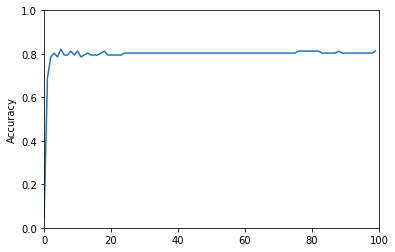

In [39]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.ylabel('Accuracy')
plt.axis([0, 100, 0, 1])
plt.show()

In [36]:
# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(label_pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [40]:
print(acc.max())
print(acc.argmax(axis=0))

0.82142854
5


In [41]:
# on 1000 epoch
print(sess.run(accuracy, feed_dict={X: X_te, Y: y_test}))

0.80357146


In [240]:
res1=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x1, Y: l1}))
res2=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x2, Y: l2}))
res3=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x3, Y: l3}))
res4=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x4, Y: l4}))
res5=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x5, Y: l5}))
res6=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x6, Y: l6}))
res7=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x7, Y: l7}))
print(res6)

[5 5 5 1 5 5 5]


In [241]:
confusion=[]
x1=np.sum(np.equal(res1, 0))
x2=np.sum(np.equal(res1, 1))
x3=np.sum(np.equal(res1, 2))
x4=np.sum(np.equal(res1, 3))
x5=np.sum(np.equal(res1, 4))
x6=np.sum(np.equal(res1, 5))
x7=np.sum(np.equal(res1, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res2, 0))
x2=np.sum(np.equal(res2, 1))
x3=np.sum(np.equal(res2, 2))
x4=np.sum(np.equal(res2, 3))
x5=np.sum(np.equal(res2, 4))
x6=np.sum(np.equal(res2, 5))
x7=np.sum(np.equal(res2, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res3, 0))
x2=np.sum(np.equal(res3, 1))
x3=np.sum(np.equal(res3, 2))
x4=np.sum(np.equal(res3, 3))
x5=np.sum(np.equal(res3, 4))
x6=np.sum(np.equal(res3, 5))
x7=np.sum(np.equal(res3, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res4, 0))
x2=np.sum(np.equal(res4, 1))
x3=np.sum(np.equal(res4, 2))
x4=np.sum(np.equal(res4, 3))
x5=np.sum(np.equal(res4, 4))
x6=np.sum(np.equal(res4, 5))
x7=np.sum(np.equal(res4, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res5, 0))
x2=np.sum(np.equal(res5, 1))
x3=np.sum(np.equal(res5, 2))
x4=np.sum(np.equal(res5, 3))
x5=np.sum(np.equal(res5, 4))
x6=np.sum(np.equal(res5, 5))
x7=np.sum(np.equal(res5, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res6, 0))
x2=np.sum(np.equal(res6, 1))
x3=np.sum(np.equal(res6, 2))
x4=np.sum(np.equal(res6, 3))
x5=np.sum(np.equal(res6, 4))
x6=np.sum(np.equal(res6, 5))
x7=np.sum(np.equal(res6, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res7, 0))
x2=np.sum(np.equal(res7, 1))
x3=np.sum(np.equal(res7, 2))
x4=np.sum(np.equal(res7, 3))
x5=np.sum(np.equal(res7, 4))
x6=np.sum(np.equal(res7, 5))
x7=np.sum(np.equal(res7, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

confusion=np.array(confusion)
print(confusion)

[[ 6  2  5  0  0  0  0]
 [ 1 32  0  0  0  2  0]
 [ 1  1  5  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  1  5  0  0  0  0]
 [ 0  1  0  0  0  6  0]
 [ 0  1  0  0  0  0 41]]


In [42]:
#SVM Classifier
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix, cohen_kappa_score
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_tr, y_tr)  

y_pred = svclassifier.predict(X_te)  

In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, y_pred)
print(accuracy)

0.8928571428571429


In [44]:
print(confusion_matrix(y_te,y_pred)) 
print(cohen_kappa_score(y_te, y_pred))

[[10  2  0  0  1  0  0]
 [ 1 34  0  0  0  0  0]
 [ 1  1  5  0  0  0  0]
 [ 0  1  0  0  1  0  0]
 [ 0  0  3  0  3  0  0]
 [ 0  1  0  0  0  6  0]
 [ 0  0  0  0  0  0 42]]
0.8528091118168875
